# 🎯 Syfte och hypoteser

I detta arbete använder vi **supervised machine learning** för att förutsäga om en kund kommer att svara på en marknadsföringskampanj (`Response`). Detta bygger vidare på tidigare klusteranalys (unsupervised learning), men här tränar vi modeller för att aktivt göra prediktioner och dra affärsrelevanta slutsatser.

## 🧠 Hypoteser

### Konsumtionsbeteende:
1. Kunder som köper mycket vin (`MntWines`) har större sannolikhet att svara på kampanjer.
2. Kunder som köper mycket kött (`MntMeatProducts`) har större sannolikhet att svara.
3. Kunder som nyligen har handlat (`Recency`) är mer benägna att svara.
4. Kunder som gör många webbköp (`NumWebPurchases`) svarar oftare än andra.

### Demografi:
5. Kunder med barn (`Kidhome`) har lägre benägenhet att svara på kampanjer.
6. Kunder med tonåringar (`Teenhome`) har lägre benägenhet att svara.

### Socioekonomiska faktorer:
7. Hög inkomst (`Income`) leder till lägre benägenhet att svara på kampanjer.

### ℹ️ Om målvariabeln `Response`

I detta dataset används variabeln `Response` som mål (target) för att avgöra om en kund har svarat på en marknadsföringskampanj eller inte.

- **`0` = Nej** → Kunden har **inte svarat** på kampanjen  
- **`1` = Ja** → Kunden har **svarat** på kampanjen

Syftet med vår analys och modell är att förstå vad som skiljer de två grupperna åt, och att bygga en modell som kan **förutsäga vilka kunder som är mest benägna att svara** på framtida kampanjer.


# 📦 Steg 1: Ladda in data
Här laddar vi in datasetet med information om kunder och deras beteende. Vi antar att filen heter `marketing_campaign.csv` och är separerad med tabbar (`\t`).

In [18]:
import pandas as pd

df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 🧹 Steg 2: Datarening
Eftersom datarening redan gjordes i tidigare projekt kontrollerar vi bara snabbt:
- Om det finns dubbletter
- Om det finns saknade värden

In [19]:
# Ta bort eventuella dubbletter
df = df.drop_duplicates()

# ta bort saknade värden
df=df.dropna()

In [20]:
# Kontrollera saknade värden
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# 📊 Steg 3: Feature Engineering
Vi skapar kolumnen `Age` från födelseår och väljer ut de variabler som ska användas som features i vår modell. 
Variabeln `Response` är vår målvariabel (target).

In [21]:
# Skapa ny feature: Ålder
df['Age'] = 2025 - df['Year_Birth']

# Definiera features och skapa ny dataframe
features = ['Income', 'Recency', 'MntWines', 'NumWebPurchases',
            'MntMeatProducts', 'Kidhome', 'Teenhome', 'Age']
df = df[features + ['Response']]

# 📈 Steg 4: Exploratory Data Analysis (EDA)
Vi analyserar hur de olika variablerna relaterar till `Response` för att se vilka faktorer som kan vara viktiga i modellen.

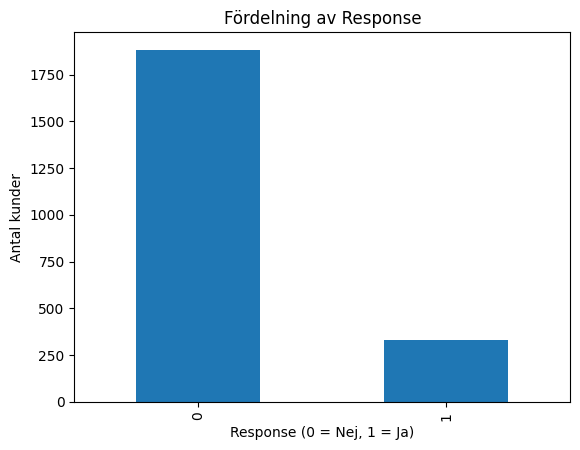

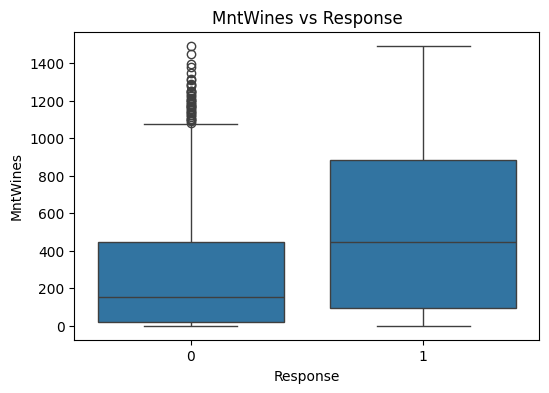

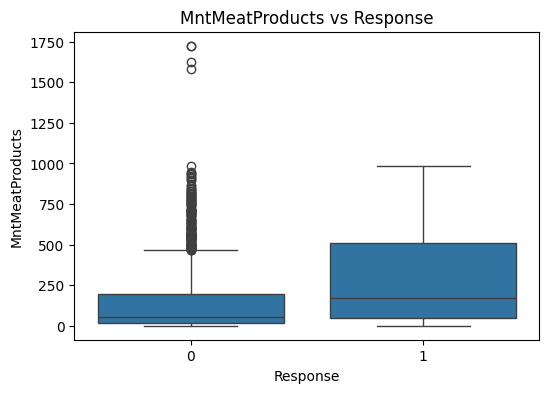

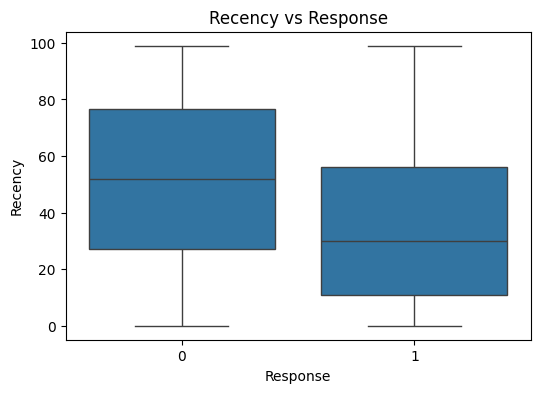

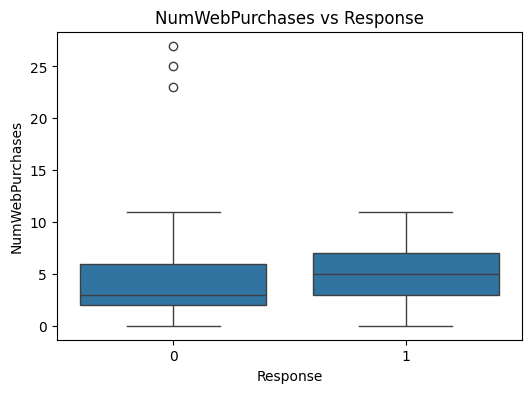

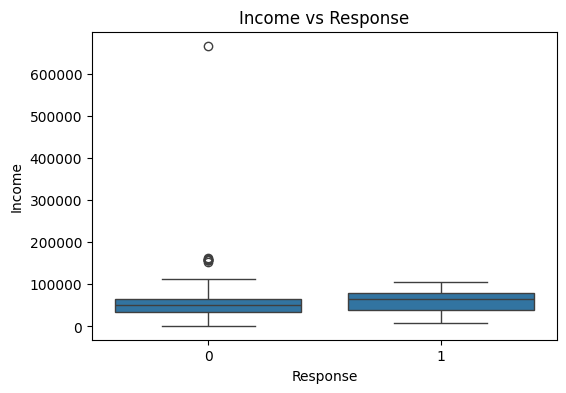

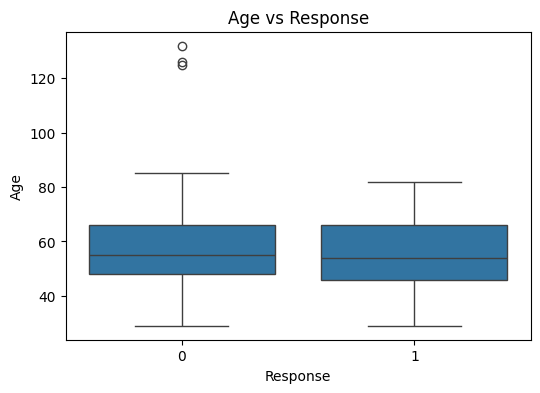

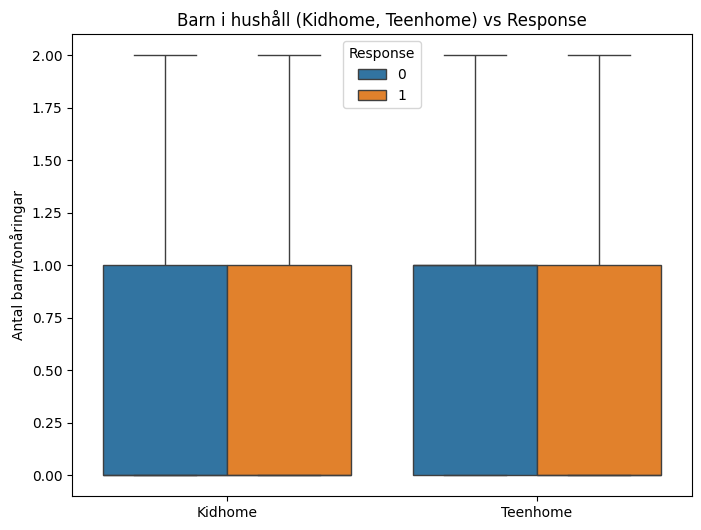

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram: Fördelning av Response
df['Response'].value_counts().plot(kind='bar', title='Fördelning av Response')
plt.xlabel('Response (0 = Nej, 1 = Ja)')
plt.ylabel('Antal kunder')
plt.show()

# Boxplots för varje feature vs Response

for col in ['MntWines', 'MntMeatProducts', 'Recency', 'NumWebPurchases', 'Income', 'Age']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Response', y=col, data=df)
    plt.title(f'{col} vs Response')
    plt.xlabel('Response')
    plt.ylabel(col)
    plt.show()

# Kidhome och Teenhome ihop
df_melted = df.melt(id_vars='Response', value_vars=['Kidhome', 'Teenhome'],
                    var_name='Variable', value_name='Value')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Variable', y='Value', hue='Response', data=df_melted)
plt.title('Barn i hushåll (Kidhome, Teenhome) vs Response')
plt.xlabel('')
plt.ylabel('Antal barn/tonåringar')
plt.legend(title='Response')
plt.show()

## 📊 EDA – Visualisering och tolkning av variabler mot Response

### 🎯 Fördelning av Response

Histogrammet visar en kraftig snedfördelning: majoriteten av kunderna (ca 85%) svarade **inte** på kampanjen (`Response = 0`), medan endast en mindre grupp (ca 15%) gjorde det (`Response = 1`). Detta är viktigt att ha i åtanke då vi går vidare till modellering – obalanserade klasser kan påverka prediktionsförmågan.

---

### 🍷 MntWines vs Response

Kunder som svarade (`Response = 1`) tenderar att ha en **avsevärt högre vin-konsumtion** jämfört med de som inte svarade. Medianen är markant högre och det finns även fler extrema konsumenter. Detta stödjer hypotesen att vininköp är en stark prediktor för respons på kampanjer.

---

### 🥩 MntMeatProducts vs Response

Liknande mönster som med vin: de kunder som svarade på kampanjen har generellt **högre konsumtion av köttprodukter**. Även här är spridningen större bland de som svarat. Detta stärker hypotesen att hög konsumtion kan indikera större engagemang eller lojalitet.

---

### ⏳ Recency vs Response

Här ser vi att kunder som svarat nyligen har ett lägre värde på `Recency`, dvs de har **handlat mer nyligen** än de som inte svarade. Det stärker hypotesen att nyare köpvanor är kopplade till högre engagemang.

---

### 🛍️ NumWebPurchases vs Response

De kunder som svarade tenderar att ha gjort **något fler webbköp**, även om skillnaden är måttlig. Medianen ligger högre för de som svarade, vilket tyder på att digitalt köp-beteende kan vara en viss indikator för kampanjrespons.

---

### 💰 Income vs Response

Här är resultatet mer oväntat: inkomsten är **ganska lik mellan grupperna**. Det finns outliers bland de som inte svarade, vilket kan dra upp spridningen. Men överlag ser det inte ut att vara någon stark prediktor. Hypotesen om att hög inkomst skulle minska responsen stöds inte tydligt.

---

### 👵 Age vs Response

Fördelningen av ålder är ganska jämn mellan de två grupperna, men kunder som svarade tenderar att vara något äldre i median. Dock är skillnaden relativt liten. Möjligen kan ålder spela en roll i kombination med andra variabler.

---

### 👶 Kidhome och Teenhome vs Response

I denna sammanslagna visualisering ser vi att det **inte verkar finnas någon större skillnad** i antal barn eller tonåringar i hushållet mellan de som svarat och inte. Det tyder på att dessa demografiska faktorer kanske inte påverkar svarsfrekvensen särskilt mycket – men de kan fortfarande ingå i modellen för att kontrollera eventuell svag påverkan i kombination med andra variabler.

---

## 🧠 Slutsats

Flera av hypoteserna bekräftas visuellt: särskilt `MntWines`, `MntMeatProducts`, `Recency` och `NumWebPurchases` visar tydliga mönster kopplat till kampanjrespons. Dessa variabler bör prioriteras vid modellbygge. Andra, som `Income`, `Age` och antal barn, visar svagare samband men kan fortfarande vara av värde för helheten.

# 🔀 Steg 5: Train/Test-split
Vi delar upp data i indata (X) och målvariabel (y) samt tränings- och testdata. Detta används sedan i modeller.

## 🔀 Uppdelning i tränings- och testdata

För att kunna träna och utvärdera vår modell korrekt delar vi upp datan i:

- **Träningsdata (80%)**: används för att lära modellen att känna igen mönster.
- **Testdata (20%)**: används för att mäta hur bra modellen presterar på ny, osedd data.

Vi använder `train_test_split` från Scikit-learn och sätter `random_state=42` för att få reproducerbara resultat.

In [23]:
from sklearn.model_selection import train_test_split

# Separera features och målvariabel
X = df[features]
y = df['Response']

# Dela upp i träning- och testdata (80% träning, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 💾 Steg 6: Exportera tränings- och testdata

Vi sparar tränings- och testdatan i separata `.csv`-filer så att de enkelt kan återanvändas e


In [24]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)